# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>

## <span style="color:blue">  Numerical exercises 6</span>

In [1]:
import csv
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

def FileImport (nomefile=None, data_array=None, i=None):
    with open(nomefile) as fileinput:
        f=open(nomefile, 'r')
        lines=f.readlines()
        for x in lines:
            data_array.append(float(x.split()[i]))
        f.close()
        
#System parameters
points=16
T = np.linspace(0.5,2.0,num=points)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th
e = -J*( th + ch*thN )/( 1 + thN )        


# <span style="color:red">  Exercise 06.1 </span>

# Ising 1D model

In this exercise I simulated a 1D Ising model, using both **Metropolis** and **Gibbs** algorithms. 

I completed the given code adding the possibility to start from previously simulated configuration, and adding the algorithms for Metropolis and Gibbs.

The simulations are with Periodic Boundary Conditions and the system interaction is only with nearest neighbors. The Hamiltonian than is (assuming that $\mu_B=1$ and $k_B=1$):

$$
H = 
-J\sum_{i=1}^N s_i s_{i+1}
-\frac{h}{2}\sum_{i=1}^N (s_i + s_{i+1}) 
$$

where $\{ s_i \}_{i=1,N}$ are spin variables taking values in $\{-1;1\}$.

In the simulations which results are shown below: 
- $J=1$
- $N=50$

Below I report the pictures for *Internal energy*, *Magnetization*, *Magnetic Susceptivity* and *Specific Heat*, evaluated using data blocking method.

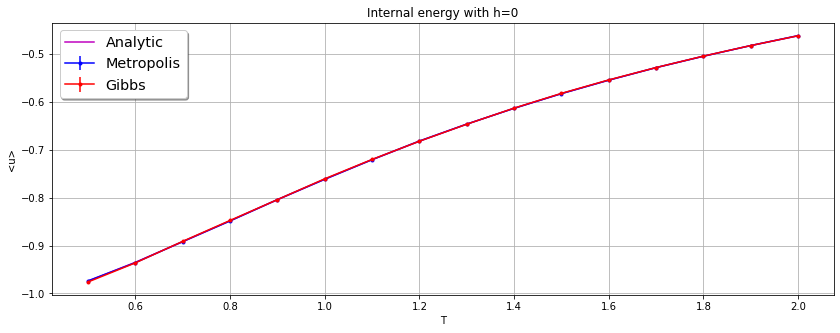

In [2]:
u_metr, error_u_metr, uT_metr, error_uT_metr = [], [], [], []
u_gibbs, error_u_gibbs, uT_gibbs, error_uT_gibbs = [], [], [], []

FileImport("../Es6/Metropolis_data/output.ene.0", u_metr, 2)
FileImport("../Es6/Metropolis_data/output.ene.0", error_u_metr, 3)
FileImport("../Es6/Gibbs_data/output.ene.0", u_gibbs, 2)
FileImport("../Es6/Gibbs_data/output.ene.0", error_u_gibbs, 3)

#save the data at every 0.1 T from 0.5 to 2.0
for i in range(1,17):
    uT_metr.append(u_metr[i*20-1])
    error_uT_metr.append(error_u_metr[i*20-1])
    
#save the data at every 0.1 T from 0.5 to 2.0
for i in range(1,17):
    uT_gibbs.append(u_gibbs[i*20-1])
    error_uT_gibbs.append(error_u_gibbs[i*20-1])
    
fig=plt.figure(figsize=(14,5))
plt.plot(T, e, 'm', label='Analytic')
plt.errorbar(T,uT_metr,yerr=error_uT_metr, color='b', marker='.', label='Metropolis')
plt.errorbar(T,uT_gibbs,yerr=error_uT_gibbs, color='r', marker='.', label= 'Gibbs')
plt.title('Internal energy with h=0')
legend = plt.legend(loc='upper left', shadow=True, fontsize='x-large')
plt.xlabel('T')
plt.ylabel('<u>')
plt.grid(True)
plt.show()

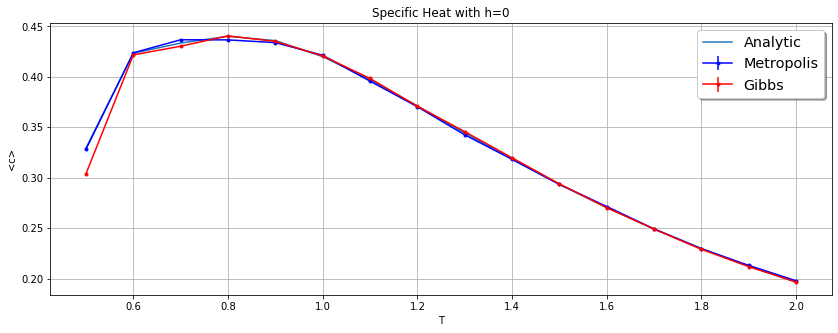

In [3]:
heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)

c_metr, error_c_metr, cT_metr, error_cT_metr = [], [], [], []
c_gibbs, error_c_gibbs, cT_gibbs, error_cT_gibbs = [], [], [], []

FileImport("../Es6/Metropolis_data/output.heat.0", c_metr, 2)
FileImport("../Es6/Metropolis_data/output.heat.0", error_c_metr, 3)
FileImport("../Es6/Gibbs_data/output.heat.0", c_gibbs, 2)
FileImport("../Es6/Gibbs_data/output.heat.0", error_c_gibbs, 3)

#save the data at every 0.1 T from 0.5 to 2.0
for i in range(1,17):
    cT_metr.append(c_metr[i*20-1])
    error_cT_metr.append(error_c_metr[i*20-1])
#save the data at every 0.1 T from 0.5 to 2.0
for i in range(1,17):
    cT_gibbs.append(c_gibbs[i*20-1])
    error_cT_gibbs.append(error_c_gibbs[i*20-1])
    
fig=plt.figure(figsize=(14,5))
plt.plot(T, heat, label='Analytic')
plt.errorbar(T,cT_metr,yerr=error_cT_metr, color='b', marker='.', label='Metropolis')
plt.errorbar(T,cT_gibbs,yerr=error_cT_gibbs, color='r', marker='.', label= 'Gibbs')
plt.title('Specific Heat with h=0')
legend = plt.legend(loc='upper right', shadow=True, fontsize='x-large')
plt.xlabel('T')
plt.ylabel('<c>')
plt.grid(True)
plt.show()

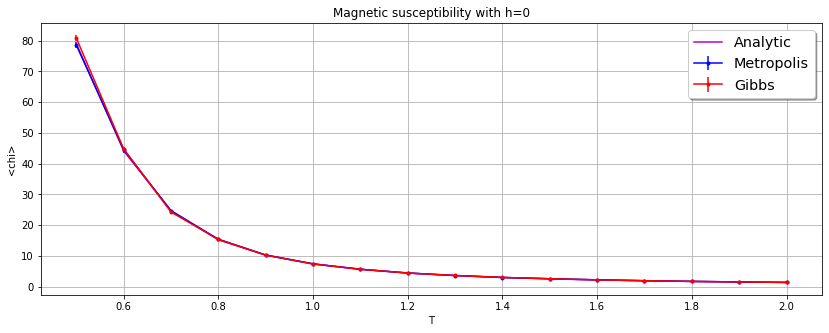

In [4]:
X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)

chi_metr, error_chi_metr, chiT_metr, error_chiT_metr = [], [], [], []
chi_gibbs, error_chi_gibbs, chiT_gibbs, error_chiT_gibbs = [], [], [], []

FileImport("../Es6/Metropolis_data/output.susc.0", chi_metr, 2)
FileImport("../Es6/Metropolis_data/output.susc.0", error_chi_metr, 3)
FileImport("../Es6/Gibbs_data/output.susc.0", chi_gibbs, 2)
FileImport("../Es6/Gibbs_data/output.susc.0", error_chi_gibbs, 3)

#save the data at every 0.1 T from 0.5 to 2.0
for i in range(1,17):
    chiT_metr.append(chi_metr[i*20-1])
    error_chiT_metr.append(error_chi_metr[i*20-1])
    
#save the data at every 0.1 T from 0.5 to 2.0
for i in range(1,17):
    chiT_gibbs.append(chi_gibbs[i*20-1])
    error_chiT_gibbs.append(error_chi_gibbs[i*20-1])

fig=plt.figure(figsize=(14,5))
plt.plot(T, X, 'm', label='Analytic')
plt.errorbar(T,chiT_metr,yerr=error_chiT_metr, color='b', marker='.', label='Metropolis')
plt.errorbar(T,chiT_gibbs,yerr=error_chiT_gibbs, color='r', marker='.', label= 'Gibbs')
legend = plt.legend(loc='upper right', shadow=True, fontsize='x-large')
plt.title('Magnetic susceptibility with h=0')
plt.xlabel('T')
plt.ylabel('<chi>')
plt.grid(True)
plt.show()

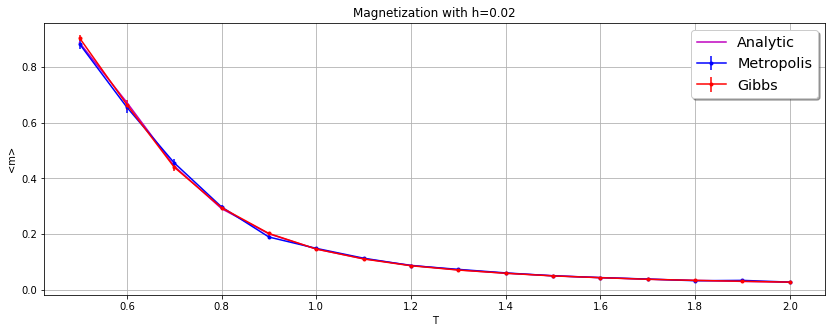

In [5]:
h=0.02 #external field
b=1/T

l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)

m_metr, error_m_metr, mT_metr, error_mT_metr = [], [], [], []

m_gibbs, error_m_gibbs, mT_gibbs, error_mT_gibbs = [], [], [], []


FileImport("../Es6/Metropolis_data/output.mag.0.02", m_metr, 2)
FileImport("../Es6/Metropolis_data/output.mag.0.02", error_m_metr, 3)
FileImport("../Es6/Gibbs_data/output.mag.0.02", m_gibbs, 2)
FileImport("../Es6/Gibbs_data/output.mag.0.02", error_m_gibbs, 3)

#save the data at every T with N=20
for i in range(1,17):
    mT_metr.append(m_metr[i*20-1])
    error_mT_metr.append(error_m_metr[i*20-1])
    
#save the data at every T with N=20
for i in range(1,17):
    mT_gibbs.append(m_gibbs[i*20-1])
    error_mT_gibbs.append(error_m_gibbs[i*20-1])

points=16
T = np.linspace(0.5,2.,num=points)

fig=plt.figure(figsize=(14,5))
plt.plot(T, M, 'm', label='Analytic')
plt.errorbar(T,mT_metr,yerr=error_mT_metr, color='b', marker='.', label='Metropolis')
plt.errorbar(T,mT_gibbs,yerr=error_mT_gibbs, color='r', marker='.', label='Gibbs')
plt.title('Magnetization with h=0.02')
legend = plt.legend(loc='upper right', shadow=True, fontsize='x-large')
plt.xlabel('T')
plt.ylabel('<m>')
plt.grid(True)
plt.show()

As we can see both Metropolis and Gibbs samplings obtain good results, in accord to the analytical ones.